In [30]:
import numpy as np
import pandas as pd

import pickle

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
#from catboost import CatBoostRegressor
#from xgboost import XGBRegressor

import matplotlib.pyplot as plt
import seaborn as sns

In [42]:

df=pd.read_csv("EncodedDF.csv")
# get option to get maximum columns displayed
pd.set_option('display.max_columns', None)
display(df)

,Unnamed: 0,Phase,Time Period,Value,LowCI,HighCI,TPS_Day,TPS_Month,TPS_Year,TPE_Day,TPE_Month,TPE_Year,LowerQR,HigherQR,"Indicator_Needed Counseling or Therapy But Did Not Get It, Last 4 Weeks","Indicator_Received Counseling or Therapy, Last 4 Weeks","Indicator_Took Prescription Medication for Mental Health And/Or Received Counseling or Therapy, Last 4 Weeks","Indicator_Took Prescription Medication for Mental Health, Last 4 Weeks",Group_By Age,Group_By Education,Group_By Gender,Group_By Presence of Symptoms of Anxiety/Depression,Group_By Race/Hispanic ethnicity,Group_By State,Group_National Estimate,State_Alabama,State_Alaska,State_Arizona,State_Arkansas,State_California,State_Colorado,State_Connecticut,State_Delaware,State_District of Columbia,State_Florida,State_Georgia,State_Hawaii,State_Idaho,State_Illinois,State_Indiana,State_Iowa,State_Kansas,State_Kentucky,State_Louisiana,State_Maine,State_Maryland,State_Massachusetts,State_Michigan,State_Minnesota,State_Mississippi,State_Missouri,State_Montana,State_Nebraska,State_Nevada,State_New Hampshire,State_New Jersey,State_New Mexico,State_New York,State_North Carolina,State_North Dakota,State_Ohio,State_Oklahoma,State_Oregon,State_Pennsylvania,State_Rhode Island,State_South Carolina,State_South Dakota,State_Tennessee,State_Texas,State_United States,State_Utah,State_Vermont,State_Virginia,State_Washington,State_West Virginia,State_Wisconsin,State_Wyoming,Subgroup_18 - 29 years,Subgroup_30 - 39 years,Subgroup_40 - 49 years,Subgroup_50 - 59 years,Subgroup_60 - 69 years,Subgroup_70 - 79 years,Subgroup_80 years and above,Subgroup_Alabama,Subgroup_Alaska,Subgroup_Arizona,Subgroup_Arkansas,Subgroup_Bachelor's degree or higher,Subgroup_California,Subgroup_Colorado,Subgroup_Connecticut,Subgroup_Delaware,Subgroup_Did not experience symptoms of anxiety/depression in the past 4 weeks,Subgroup_District of Columbia,Subgroup_Experienced symptoms of anxiety/depression in past 4 weeks,Subgroup_Female,Subgroup_Florida,Subgroup_Georgia,Subgroup_Hawaii,Subgroup_High school diploma or GED,Subgroup_Hispanic or Latino,Subgroup_Idaho,Subgroup_Illinois,Subgroup_Indiana,Subgroup_Iowa,Subgroup_Kansas,Subgroup_Kentucky,Subgroup_Less than a high school diploma,Subgroup_Louisiana,Subgroup_Maine,Subgroup_Male,Subgroup_Maryland,Subgroup_Massachusetts,Subgroup_Michigan,Subgroup_Minnesota,Subgroup_Mississippi,Subgroup_Missouri,Subgroup_Montana,Subgroup_Nebraska,Subgroup_Nevada,Subgroup_New Hampshire,Subgroup_New Jersey,Subgroup_New Mexico,Subgroup_New York,"Subgroup_Non-Hispanic Asian, single race","Subgroup_Non-Hispanic black, single race","Subgroup_Non-Hispanic white, single race","Subgroup_Non-Hispanic, other races and multiple races",Subgroup_North Carolina,Subgroup_North Dakota,Subgroup_Ohio,Subgroup_Oklahoma,Subgroup_Oregon,Subgroup_Pennsylvania,Subgroup_Rhode Island,Subgroup_Some college/Associate's degree,Subgroup_South Carolina,Subgroup_South Dakota,Subgroup_Tennessee,Subgroup_Texas,Subgroup_United States,Subgroup_Utah,Subgroup_Vermont,Subgroup_Virginia,Subgroup_Washington,Subgroup_West Virginia,Subgroup_Wisconsin,Subgroup_Wyoming
0,0,2,13,19.4,19.0,19.8,19,8,2020,31,8,2020,23.8,25.9,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,1,2,13,18.7,17.2,20.3,19,8,2020,31,8,2020,23.8,25.9,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2,2,13,18.3,17.3,19.2,19,8,2020,31,8,2020,23.8,25.9,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [3]:
X=df.drop(['Unnamed: 0','Value'],axis=1)
Y=df['Value']
X

,Phase,Time Period,LowCI,HighCI,TPS_Day,TPS_Month,TPS_Year,TPE_Day,TPE_Month,TPE_Year,...,Subgroup_Tennessee,Subgroup_Texas,Subgroup_United States,Subgroup_Utah,Subgroup_Vermont,Subgroup_Virginia,Subgroup_Washington,Subgroup_West Virginia,Subgroup_Wisconsin,Subgroup_Wyoming
0,2,13,19.0,19.8,19,8,2020,31,8,2020,...,0,0,1,0,0,0,0,0,0,0
1,2,13,17.2,20.3,19,8,2020,31,8,2020,...,0,0,0,0,0,0,0,0,0,0
2,2,13,17.3,19.2,19,8,2020,31,8,2020,...,0,0,0,0,0,0,0,0,0,0
3,2,13,19.5,21.3,19,8,2020,31,8,2020,...,0,0,0,0,0,0,0,0,0,0
4,2,13,20.2,22.2,19,8,2020,31,8,2020,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3823,3,25,7.0,12.8,17,2,2021,1,3,2021,...,0,0,0,0,0,1,0,0,0,0
3824,3,25,10.9,14.6,17,2,2021,1,3,2021,...,0,0,0,0,0,0,1,0,0,0
3825,3,25,10.1,16.3,17,2,2021,1,3,2021,...,0,0,0,0,0,0,0,1,0,0
3826,3,25,7.9,14.4,17,2,2021,1,3,2021,...,0,0,0,0,0,0,0,0,1,0


In [4]:
Y

0       19.4
1       18.7
2       18.3
3       20.4
4       21.2
        ... 
3823     9.6
3824    12.6
3825    13.0
3826    10.8
3827    16.2
Name: Value, Length: 3828, dtype: float64

In [5]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25,random_state=10)
#x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=23, stratify=Y)

LinearRegression()

0.9999354002689472


In [8]:
Y_pred_test=LR_Model.predict(X_test)
mae=mean_absolute_error(Y_test,Y_pred_test)
r2=r2_score(Y_test,Y_pred_test)
mse=mean_squared_error(Y_test,Y_pred_test)
print(r2)

0.9999367015971239


In [14]:
def ModelEvaluation(Y_train,Y_pred_train):
    mae=mean_absolute_error(Y_train,Y_pred_train)
    r2=r2_score(Y_train,Y_pred_train)
    mse=mean_squared_error(Y_train,Y_pred_train)  
    return mae,mse,r2

In [ ]:
models={
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    #"XGBRegressor": XGBRegressor(), 
    #"CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
    }
model_list = []
r2_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, Y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = ModelEvaluation(Y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = ModelEvaluation(Y_test, y_test_pred)

    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')

In [21]:
Model_outcome=pd.DataFrame(list(zip(model_list,r2_list)),columns=['Model','R2 Score']).sort_values(['R2 Score'],ascending=False)
Model_outcome.reset_index()

,index,Model,R2 Score
0,2,Ridge,0.999937
1,0,Linear Regression,0.999937
2,5,Random Forest Regressor,0.999460
3,1,Lasso,0.999368
4,4,Decision Tree,0.998354
5,6,AdaBoost Regressor,0.993932
6,3,K-Neighbors Regressor,0.991226


In [22]:
LR_Model=LinearRegression()
LR_Model
LR_Model.fit(X_train,Y_train)
Y_pred_train=LR_Model.predict(X_train)
mae=mean_absolute_error(Y_train,Y_pred_train)
r2=r2_score(Y_train,Y_pred_train)
mse=mean_squared_error(Y_train,Y_pred_train)
print(r2)

0.9999354002689472


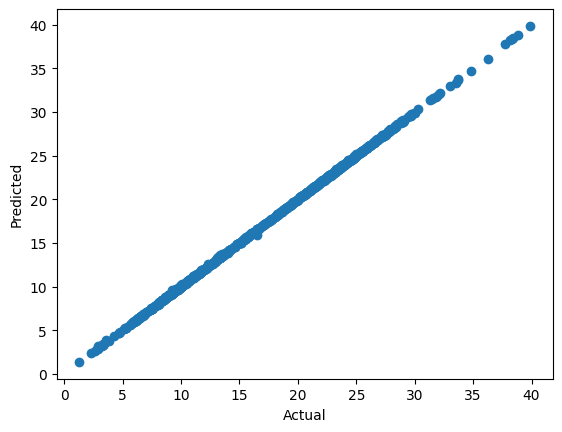

In [27]:
plt.scatter(Y_test,Y_pred_test)
plt.xlabel('Actual');
plt.ylabel('Predicted');
plt.show()

In [31]:
pickle.dump(LR_Model, open('USHouseHoldMentalHealth-Model.pkl', 'wb'))

## Label Encoding prediction

# One Hot Encoding Prediction

In [106]:
columns_list = X.columns
columns_list


Index(['Phase', 'Time Period', 'LowCI', 'HighCI', 'TPS_Day', 'TPS_Month',
       'TPS_Year', 'TPE_Day', 'TPE_Month', 'TPE_Year',
       ...
       'Subgroup_Tennessee', 'Subgroup_Texas', 'Subgroup_United States',
       'Subgroup_Utah', 'Subgroup_Vermont', 'Subgroup_Virginia',
       'Subgroup_Washington', 'Subgroup_West Virginia', 'Subgroup_Wisconsin',
       'Subgroup_Wyoming'],
      dtype='object', length=147)

In [35]:
file = open("USHouseHoldMentalHealth.obj", "wb")
pickle.dump(columns_list, file)
file.close()

In [107]:
array=np.zeros(len(columns_list))
array

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [ ]:
# List of All COlumns
X.columns.values.tolist()

# Testing the instance on a sample

In [108]:
Phase=2
Time_Period=13
LowCI=19.0
HighCI=19.8
TPS_Day=18
TPS_Month=8
TPS_Year=2020
TPE_Day=31
TPE_Month=8
TPE_Year=2020
LowerQR=23.8
HigherQR=25.9
#Indic="Took Prescription Medication for Mental Health, Last 4 Weeks"
Indicator="Indicator_"+"Took Prescription Medication for Mental Health, Last 4 Weeks"
Group="Group_"+"National Estimate"
State="State_"+"United States"
Subgroup="Subgroup_"+"United States"

In [109]:
print(Indicator)

Indicator_Took Prescription Medication for Mental Health, Last 4 Weeks


In [110]:
array[0]=Phase
array[1]=Time_Period
array[2]=LowCI
array[3]=HighCI
array[4]=TPS_Day
array[5]=TPS_Month
array[6]=TPS_Year
array[7]=TPE_Day
array[8]=TPE_Month
array[9]=TPE_Year
array[10]=LowerQR
array[11]=HigherQR
Indicator_index = np.where(columns_list ==Indicator)[0][0]
array[Indicator_index] = 1
Group_index = np.where(columns_list ==Group)[0][0]
array[Group_index] = 1
State_index = np.where(columns_list ==State)[0][0]
array[State_index] = 1
Subgroup_index = np.where(columns_list ==Subgroup)[0][0]
array[Subgroup_index] = 1

In [113]:
array=array.reshape(1,-1)

In [114]:
prediction = LR_Model.predict(array)
prediction

C:\Users\ASHISH\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([19.42779708])